In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [48]:
# load data from wineQT.csv
data_wine = pd.read_csv("../WineQT.csv")

data_wine.head()  # to see first 5 rows


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7,0,0,1,0,11,34,0,3,0,9,5,0
1,7,0,0,2,0,25,67,0,3,0,9,5,1
2,7,0,0,2,0,15,54,0,3,0,9,5,2
3,11,0,0,1,0,17,60,0,3,0,9,6,3
4,7,0,0,1,0,11,34,0,3,0,9,5,4


Cluster 1: 445 points
Cluster 2: 296 points
Cluster 3: 149 points
Cluster 4: 253 points


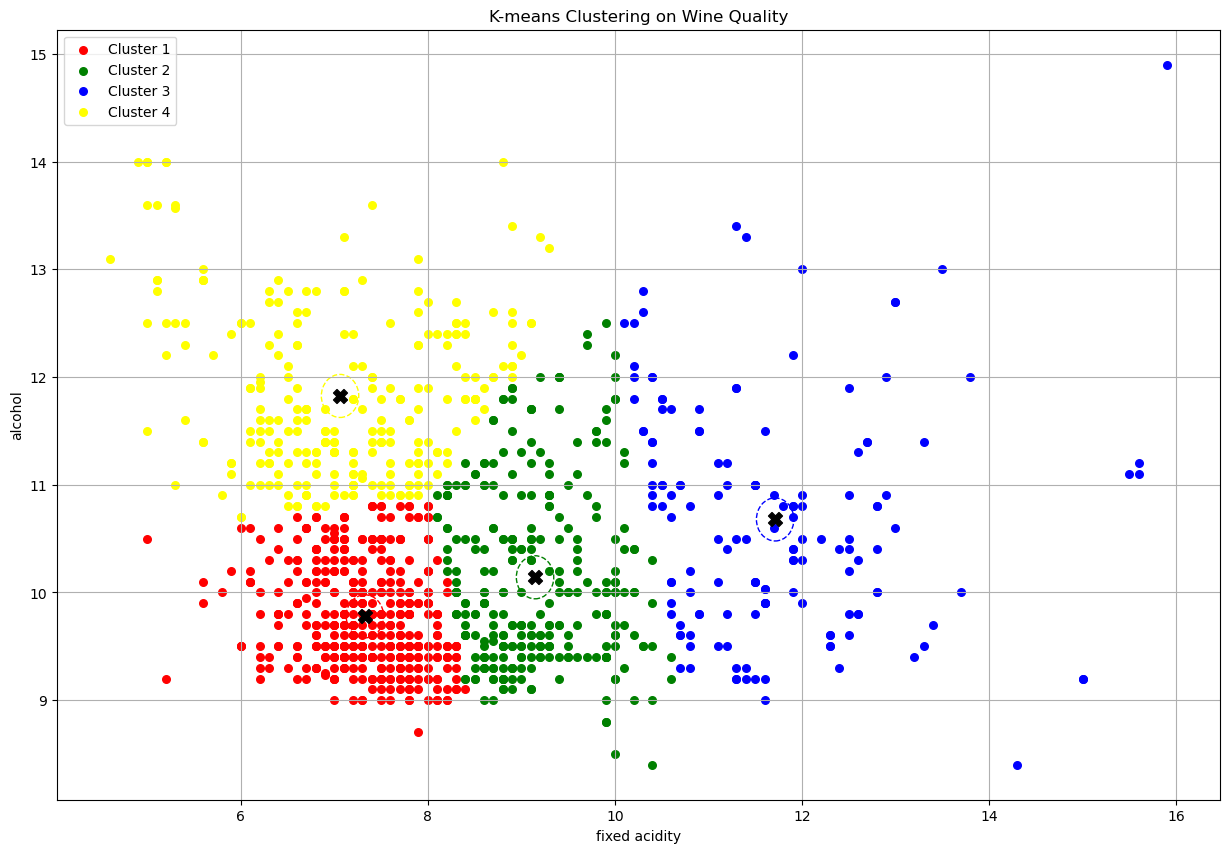

In [52]:

# Sélection des caractéristiques pour le clustering
X = data_wine[['fixed acidity', 'alcohol']].values
k = 4  # Nombre de clusters

# K-means clustering
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
# Compter le nombre de points par cluster

unique, counts = np.unique(clusters, return_counts=True)
point_counts = dict(zip(unique, counts))
# Afficher le nombre de points par cluster
for cluster_id, num_points in point_counts.items():
    print(f"Cluster {cluster_id + 1}: {num_points} points")




# ********************affichage****************************************************
plt.figure(figsize=(15, 10))
colors = ['red', 'green', 'blue', 'yellow']

# Tracer chaque cluster
for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], s=30, color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[i, 0], centroids[i, 1], s=100, color='black', marker='X')  # Centroïde

# Dessiner des cercles autour des clusters
for i in range(k):
    circle = plt.Circle(centroids[i], 0.2, color=colors[i], fill=False, linestyle='dashed')
    plt.gca().add_artist(circle)

plt.title('K-means Clustering on Wine Quality')
plt.xlabel('fixed acidity')
plt.ylabel('alcohol')
plt.legend()
plt.grid()
plt.show()

rappel sur le kmeans : algorithme d'apprentissage non supervisé utilisé pour regrouper (ou "cluster") des données en K groupes distincts
L'objectif est de regrouper des données similaires dans un même cluster et de maximiser la différence entre les clusters

analyse des clusters 

visualisation des résultats